# Import necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# define data file name
data_file = "../project1_data/Rice_Cammeo_Osmancik.csv"

#load data
data = pd.read_csv(data_file)
data.describe()

# Remove non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Outliers: boxplot

## Data Loading and Preprocessing

In [5]:
# Select columns for analysis
raw_data = data_numeric.values
cols = range(0, 7)
X_raw = raw_data[:, cols]
X = X_raw.astype('float64')

# Retrieve attribute names and class labels
attributeNames = np.array(data.columns[cols])
classLabels = np.array(raw_data[:, -1]) 
classNames = np.unique(classLabels)
C = np.array(int(len(classNames)))

# Convert class labels into numerical format
y = np.empty(X.shape[0])
for i in range(0, X.shape[0]):
    y[i] = 0 if classLabels[i] == "b'Cammeo'" else 1
y = y.astype(int)


# Number of attributes and samples
M = np.array((len(attributeNames)))
N = np.array((len(y)))

## Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

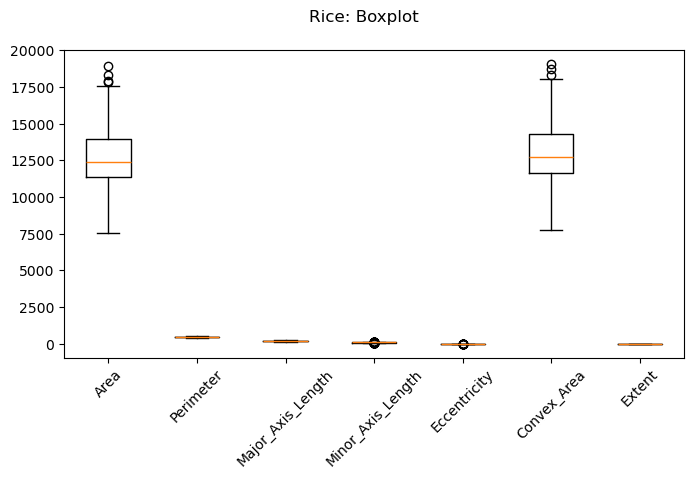

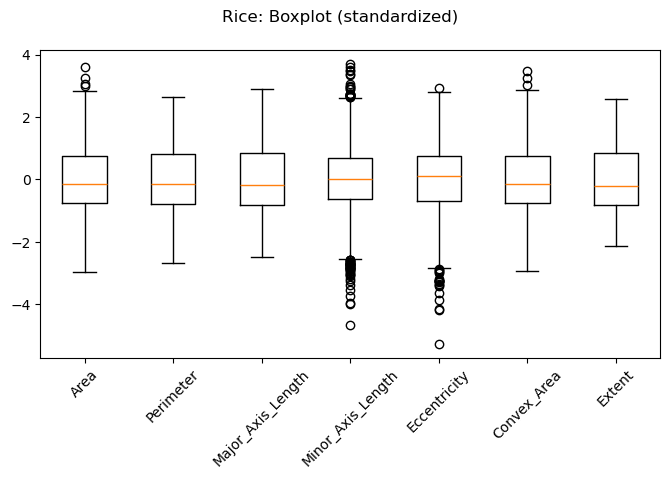

In [6]:
# Box plot of each attribute
plt.figure(figsize=(8, 4))
plt.suptitle("Rice: Boxplot")
plt.boxplot(X)
plt.xticks(range(1, M + 1), attributeNames, rotation=45);

# Box plot of standardized data to identify outliers
plt.figure(figsize=(8, 4))
plt.suptitle("Rice: Boxplot (standardized)")
plt.boxplot(zscore(X, ddof=1))
plt.xticks(range(1, M + 1), attributeNames, rotation=45);

plt.show


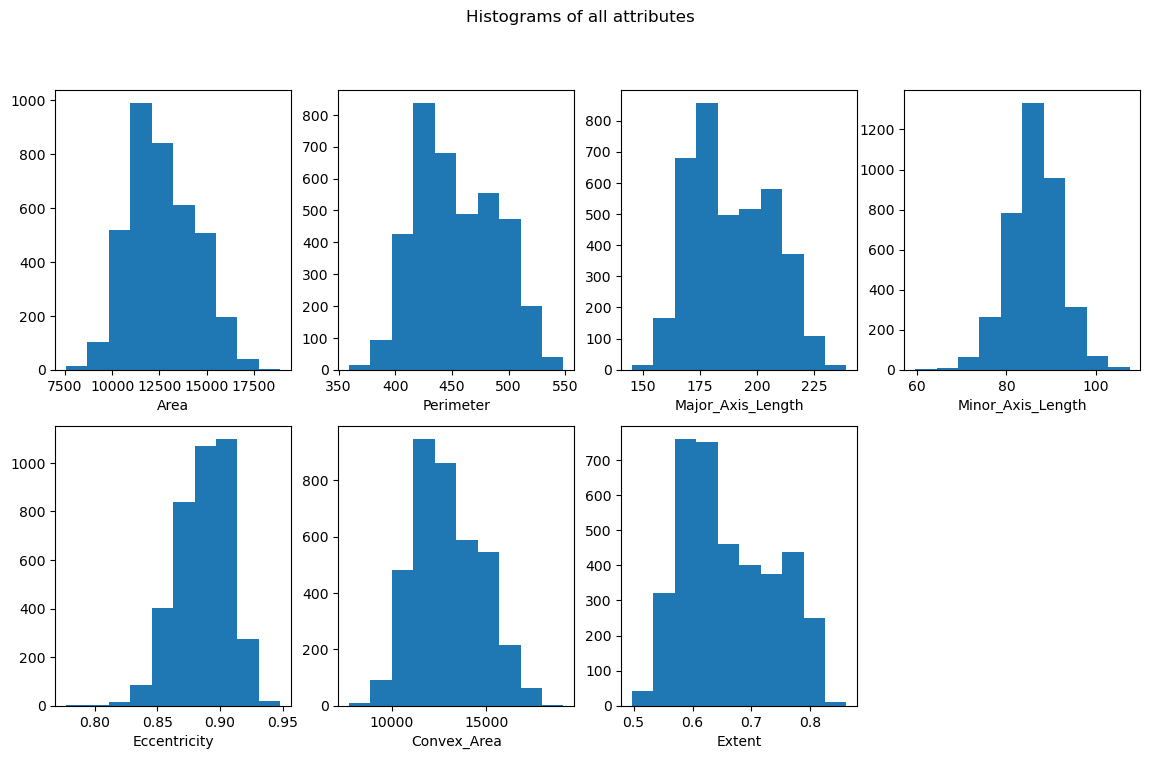

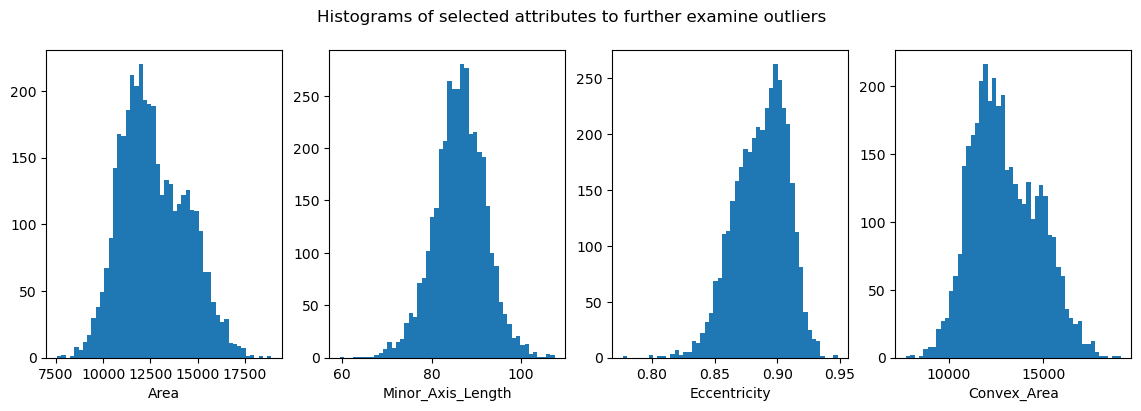

In [7]:
# Histograms of all attributes
plt.figure(figsize=(14, 8))
plt.suptitle("Histograms of all attributes")
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i])
    plt.xlabel(attributeNames[i])
    plt.ylim()

# Histograms of selected attributes to further examine outliers
plt.figure(figsize=(14, 4))
plt.suptitle("Histograms of selected attributes to further examine outliers")
m = [0, 3, 4, 5]
for i in range(len(m)):
    plt.subplot(1, len(m), i + 1)
    plt.hist(X[:, m[i]], 50)
    plt.xlabel(attributeNames[m[i]])
    plt.ylim()

plt.show()

## Outlier Detection and Removal

<function matplotlib.pyplot.show(close=None, block=None)>

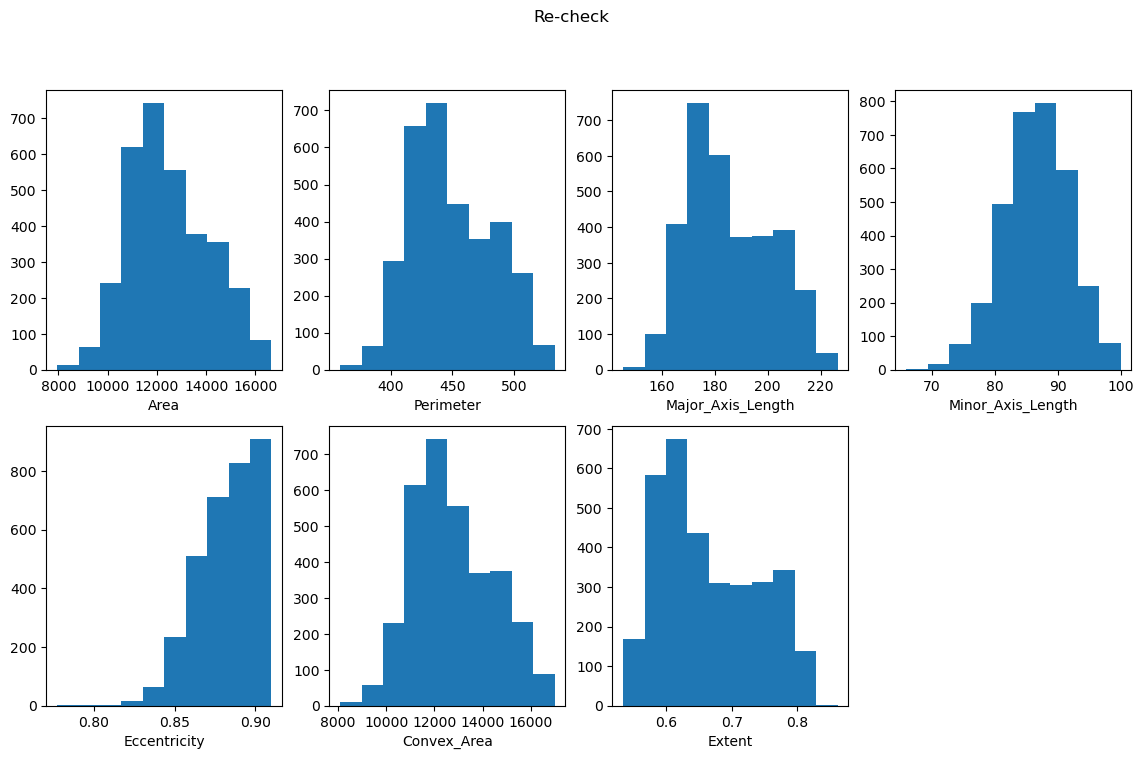

In [8]:
# Define outlier mask and remove these from the dataset
outlier_mask = (X[:, 0] > 17000) | (X[:, 3] > 100) | (X[:, 4] > 0.91) | (X[:, 5] > 17000)
valid_mask = np.logical_not(outlier_mask)
X = X[valid_mask, :]
y = y[valid_mask]
N = len(y)

# Re-check: no more outliers
plt.figure(figsize=(14, 8))
plt.suptitle("Re-check")
for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    plt.hist(X[:, i])
    plt.xlabel(attributeNames[i])
    plt.ylim()
plt.show

# Check normality: Q-Q plot

In [9]:
# do one-out-of-K encoding for the attribute "Class"
data_numeric = pd.get_dummies(data, columns=["Class"])
data_numeric.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class_b'Cammeo',Class_b'Osmancik'
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,True,False
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,True,False
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,True,False
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,True,False
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,True,False


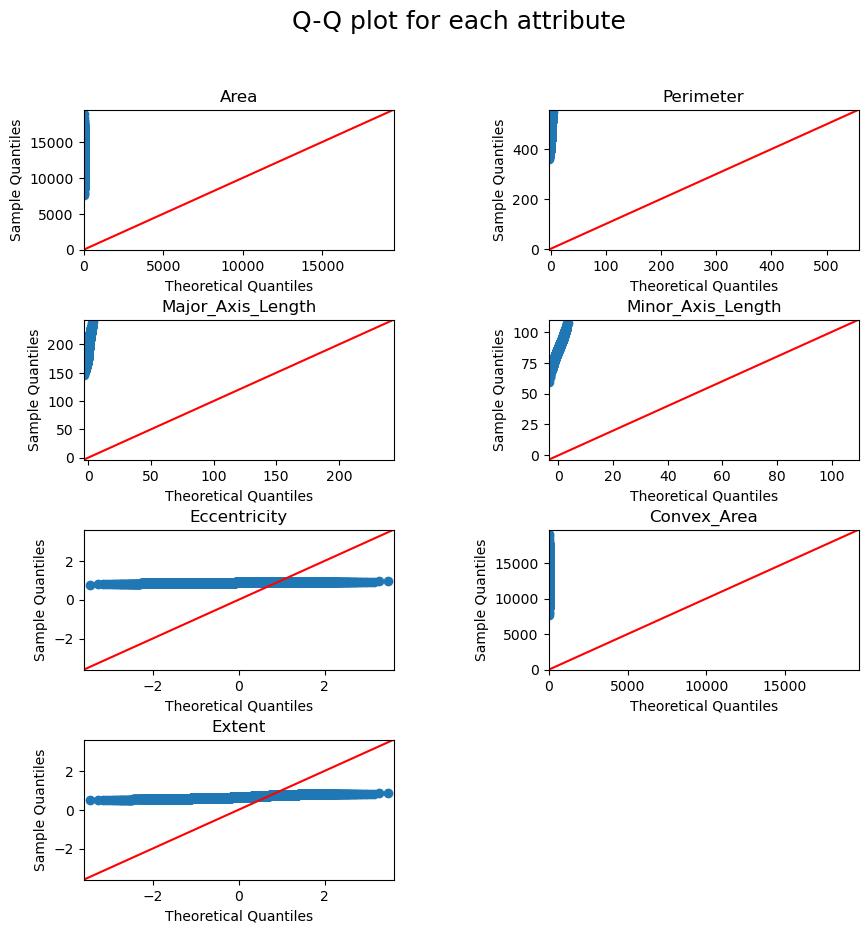

In [10]:
# check the normality of each attribute using q-q plot (only for numerical attributes)
fig, ax = plt.subplots(4,2,figsize=(10,10))
for i in range(0,7):
    row_index = i // 2
    col_index = i % 2
    ax_temp = ax[row_index,col_index]
    fig_qq = sm.qqplot(data_numeric.iloc[:, i], line='45', ax=ax_temp)
    ax_temp.set_title(data_numeric.columns[i])
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
ax[3,1].axis('off')# remove the last subplot
fig.suptitle("Q-Q plot for each attribute",fontsize=18)
plt.show()
save_path_qq = "../project1_data/qq_plot.png"
fig.savefig(save_path_qq)

# Check corrolation: corrolation matrix and heatplot

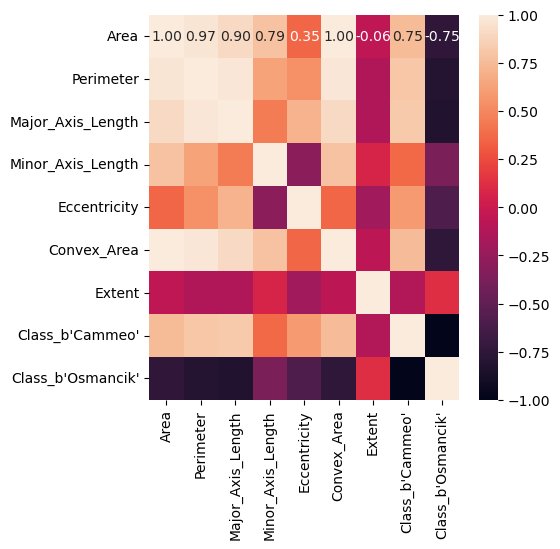

In [24]:
# Make corrolation matrix and plot the heatplot
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=correlation_matrix.values, fmt=".2f",)
plt.show()

# PCA

In [14]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_numeric)

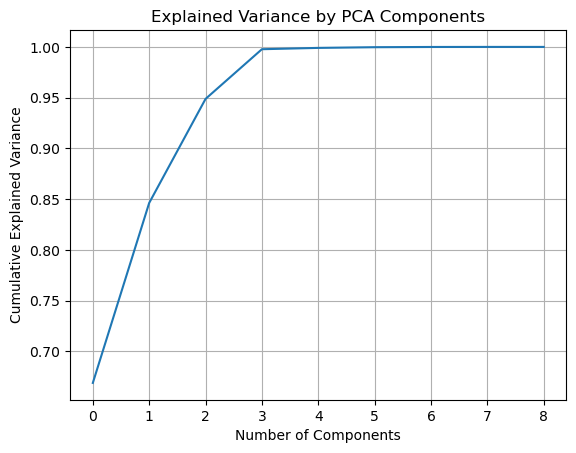

In [19]:
# Perform PCA
pca = PCA()
pca.fit(data_standardized)

# Plot the explained variance ratio for each principal component
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [21]:
# Principal directions (Eigenvectors) of the first few PCA components
print("Principal directions of the first few PCA components:")
print(pca.components_[:5])

Principal directions of the first few PCA components:
[[ 0.38920081  0.40055049  0.39371194  0.24775486  0.22703648  0.38998699
  -0.05416963  0.36408839 -0.36408839]
 [ 0.20809519  0.03513977 -0.12214271  0.61120991 -0.60797105  0.2059418
   0.31161789 -0.17002744  0.17002744]
 [-0.04918544 -0.02852951  0.04690568 -0.18134286  0.19110158 -0.05278365
   0.94594963  0.1173773  -0.1173773 ]
 [-0.17938356 -0.23437875 -0.29260176  0.05042949 -0.37645225 -0.17093307
  -0.06710681  0.56977692 -0.56977692]
 [-0.33494397  0.69587135  0.24101652 -0.32254719 -0.47459069 -0.12517021
   0.02061157 -0.00778508  0.00778508]]


In [23]:
# Data projected onto the considered principal components
pca_transformed_data = pca.transform(data_standardized)

# Convert the PCA components into a DataFrame for better visualization
pca_df = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(pca_transformed_data.shape[1])])

print("Data projected onto the first few principal components:")
print(pca_df.head())

Data projected onto the first few principal components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.198341 -1.709415 -0.493762 -1.054083  0.346469  0.265021  0.041664   
1  2.954164  0.151155 -0.496350  0.288697 -0.042120 -0.042172  0.034819   
2  3.138805 -0.511968  0.756160 -0.282921  0.078128  0.056514  0.018370   
3  1.315053 -0.422437  0.003117  1.059938 -0.185658  0.024487 -0.058696   
4  3.273951 -0.314598  0.057007 -0.165523  0.155723 -0.067509  0.120708   

        PC8           PC9  
0 -0.003681  1.325279e-16  
1 -0.016511 -8.951667e-17  
2  0.011561  2.150563e-17  
3  0.000521 -8.951667e-17  
4 -0.023667  2.150563e-17  
